### Analyzing Resume Similarity: Exploring Document Relationships
In this analysis, we delve into the similarity among different resumes to uncover patterns and relationships. By examining the content of the resumes, we aim to identify documents that share common traits or belong to the same individuals.

In [1]:
import pandas as pd
import os

#### Import the PyPDF and textract OCR Libraries

In [5]:
import PyPDF2
import textract
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [7]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#from autocorrect import Speller

#### Define Function for extract the text from the pdf files

In [8]:
def extract_text_from_pdf(file_path):

    textdata = PyPDF2.PdfReader (file_path)
    total_pages = len(textdata.pages)
    count = 0
    text  = ''

    # Lets loop through, to read each page from the pdf file
    while(count < total_pages):
        # Get the specified number of pages in the document
        mani_page  = textdata.pages[count]
        # Process the next page
        count += 1
        # Extract the text from the page
        text += mani_page.extract_text ()
    

    if text != '':
        text = text
        
    else:
        textract.process(file_path, method='tesseract', encoding='utf-8', langauge='eng' )
        print(file_path)
    return text

In [9]:
resumes_folder = './Resumes'

In [10]:
os.listdir(resumes_folder)

['16Sep_Khushi_Singh.pdf',
 '19117104_nlp_2022-09-01_03_13_01.pdf',
 '20211401_ayush_kumar_mishra_msr_cse.pdf',
 '20B090014-5 (1).pdf',
 '20B090014-5.pdf',
 '215120014-1.pdf',
 '7521739-2dc645afc93f60dbd9dbd90d9ff21d60.pdf',
 'Aayush_Poddar_IITKGP.pdf',
 'Abhijeet_Singh_gs_resume.pdf',
 'AbhinavJain_Resume_.pdf',
 'abhinav_cv.pdf',
 'abhishek_cv_177.pdf',
 'AbhrantaPanigrahi_Resume.pdf',
 'Dr_Sachin_DataScience.pdf',
 'Dr_Sachin_DataScientist_Exp5.10 (1).pdf',
 'Dr_Sachin_DataScientist_Exp5.10.pdf',
 'Dr_Sachin_DataScientist_Exp5.7.pdf']

In [11]:
# Create an empty DataFrame with columns
df = pd.DataFrame(columns=['filename', 'text'])

#### Extract the texts from pdf files and saved to dataframe

In [12]:
# Loop through each file in the folder
count = 0
for filename in os.listdir(resumes_folder):
    masked_resume_text = []
    #print(filename)
    if filename.endswith(".pdf") or filename.endswith(".docx"):
        # Use appropriate libraries to extract text from the resume
        if filename.endswith(".pdf"):
            extracted_text = extract_text_from_pdf(os.path.join(resumes_folder, filename))
    # Create a new row as a dictionary
    new_row = {'filename': filename, 'text': extracted_text}
    
    # Add the new row to the DataFrame
    df.loc[count] = new_row
    count =count+1
    

In [13]:
df

,filename,text
0,16Sep_Khushi_Singh.pdf,Khushi Singh\nPhysics And Programming Geek\nww...
1,19117104_nlp_2022-09-01_03_13_01.pdf,"Area of Interest\nData Science, Natural Langu..."
2,20211401_ayush_kumar_mishra_msr_cse.pdf,Ayush Kumar Mishra\nMaster of Science by Resea...
3,20B090014-5 (1).pdf,Pursuing a Minor degree in Artificial Intellig...
4,20B090014-5.pdf,Pursuing a Minor degree in Artificial Intellig...
5,215120014-1.pdf,Gopal Goyal Indian Institute of Technology B...
6,7521739-2dc645afc93f60dbd9dbd90d9ff21d60.pdf,"Kathan M. Bhavsar\nAhmedabad, India kathanbhav..."
7,Aayush_Poddar_IITKGP.pdf,AAYUSH PODDARINDUSTRIAL & SYSTEMS ENGINEERING ...
8,Abhijeet_Singh_gs_resume.pdf,Abhijeet Singh \n (+91) 7782051838 | abh...
9,AbhinavJain_Resume_.pdf,Abhinav Jain\nEmail-id : abhinavjainn412@gmail...


In [14]:
df.shape

(17, 2)

#### Remove the Duplicate text of pdf files

In [15]:
# Remove duplicate rows based on the 'text' column
df1 = df.drop_duplicates(subset='text')
df1 = df1.reset_index(drop=True)
# Print the resulting DataFrame
df1.head()

,filename,text
0,16Sep_Khushi_Singh.pdf,Khushi Singh\nPhysics And Programming Geek\nww...
1,19117104_nlp_2022-09-01_03_13_01.pdf,"Area of Interest\nData Science, Natural Langu..."
2,20211401_ayush_kumar_mishra_msr_cse.pdf,Ayush Kumar Mishra\nMaster of Science by Resea...
3,20B090014-5 (1).pdf,Pursuing a Minor degree in Artificial Intellig...
4,215120014-1.pdf,Gopal Goyal Indian Institute of Technology B...


In [16]:
df1

,filename,text
0,16Sep_Khushi_Singh.pdf,Khushi Singh\nPhysics And Programming Geek\nww...
1,19117104_nlp_2022-09-01_03_13_01.pdf,"Area of Interest\nData Science, Natural Langu..."
2,20211401_ayush_kumar_mishra_msr_cse.pdf,Ayush Kumar Mishra\nMaster of Science by Resea...
3,20B090014-5 (1).pdf,Pursuing a Minor degree in Artificial Intellig...
4,215120014-1.pdf,Gopal Goyal Indian Institute of Technology B...
5,7521739-2dc645afc93f60dbd9dbd90d9ff21d60.pdf,"Kathan M. Bhavsar\nAhmedabad, India kathanbhav..."
6,Aayush_Poddar_IITKGP.pdf,AAYUSH PODDARINDUSTRIAL & SYSTEMS ENGINEERING ...
7,Abhijeet_Singh_gs_resume.pdf,Abhijeet Singh \n (+91) 7782051838 | abh...
8,AbhinavJain_Resume_.pdf,Abhinav Jain\nEmail-id : abhinavjainn412@gmail...
9,abhinav_cv.pdf,AbhinavKumarSingh\naks.singh774@gmail.com|GitH...


In [17]:
df1.shape

(15, 2)

In [18]:
stopwords = nltk.corpus.stopwords.words('english')

#### Clean the text (lower the text; remove punctuations and stopwords; mask the mail id and  mobile numbe; lemmatize words )

In [19]:
def clean_text(text):
    # Specll check the words
    #spell  = Speller(lang='en')
    
    #texts = spell(text)
    lower_case = "".join([word.lower() for word in text if word not in string.punctuation])
    #lower_case= ' '.join([w.lower() for w in word_tokenize(text)])

    # Remove single numbers using regular expression
    lower_case = re.sub(r'\b\d\b', '', lower_case)

    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)

    # Regular expressions for pattern matching
    email_regex = r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b"
    mobile_regex = r"\b\d{10}\b"
    url_regex = r"(https?://[^\s]+)"

    
    # Mask email addresses
    lower_case = re.sub(email_regex,'',  lower_case)
    
    # Mask mobile numbers
    lower_case = re.sub(mobile_regex,'',  lower_case)

    # Mask URLs
    lower_case = re.sub(url_regex, '', lower_case)
    
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
  
    # Return keywords which are not in stop words, punctuations
    keywords = [re.sub(r'\d', '', word) for word in words if word not in stopwords and not word.isdigit()]

    return keywords

In [20]:
df1['clean_text'] = df1['text'].apply(lambda x: clean_text(x))
df1.head()

,filename,text,clean_text
0,16Sep_Khushi_Singh.pdf,Khushi Singh\nPhysics And Programming Geek\nww...,"[khushi, singh, physics, programming, geek, ww..."
1,19117104_nlp_2022-09-01_03_13_01.pdf,"Area of Interest\nData Science, Natural Langu...","[area, interest, data, science, natural, langu..."
2,20211401_ayush_kumar_mishra_msr_cse.pdf,Ayush Kumar Mishra\nMaster of Science by Resea...,"[ayush, kumar, mishra, master, science, resear..."
3,20B090014-5 (1).pdf,Pursuing a Minor degree in Artificial Intellig...,"[pursuing, minor, degree, artificial, intellig..."
4,215120014-1.pdf,Gopal Goyal Indian Institute of Technology B...,"[gopal, goyal, indian, institute, technology, ..."


In [21]:
def lemmatize_function(words):
# Lemmatize the words
    wordnet_lemmatizer = WordNetLemmatizer()

    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in words]

    # lets print out the output from our function above and see how the data looks like
    clean_data = ' '.join(lemmatized_word)
    return clean_data

In [22]:
df1['clean_text'] = df1['clean_text'].apply(lambda x: lemmatize_function(x))
df1.head()

,filename,text,clean_text
0,16Sep_Khushi_Singh.pdf,Khushi Singh\nPhysics And Programming Geek\nww...,khushi singh physic programming geek wwwlinked...
1,19117104_nlp_2022-09-01_03_13_01.pdf,"Area of Interest\nData Science, Natural Langu...",area interest data science natural language pr...
2,20211401_ayush_kumar_mishra_msr_cse.pdf,Ayush Kumar Mishra\nMaster of Science by Resea...,ayush kumar mishra master science research stu...
3,20B090014-5 (1).pdf,Pursuing a Minor degree in Artificial Intellig...,pursuing minor degree artificial intelligence ...
4,215120014-1.pdf,Gopal Goyal Indian Institute of Technology B...,gopal goyal indian institute technology bombay...


#### Vectorization of data: (convert the text data to numeric values)

In [23]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


In [24]:
df2 = pd.DataFrame()
# CountVectorizer
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(df1['clean_text'])
df2 = pd.concat([df1['filename'], pd.DataFrame(X_count.toarray())], axis=1)
# Get the feature names from CountVectorizer
feature_names = count_vect.get_feature_names_out()
# Convert the array to a list
feature_names = feature_names.tolist()
# Specify column names for the resulting DataFrame
featurenames = ['filename'] + feature_names

df2.columns = featurenames


In [25]:
df2

,filename,aayush,aayushgmailc,abhijee,abhijeet,abhinav,abhinavjainngmailcom,abhinavkumarsingh,abhisgmailcom,abhishek,...,ôgrade,ôhad,ôlearning,ômaintained,ôorganized,ôprepared,ôskills,ôthis,ﬁnd,ﬂow
0,16Sep_Khushi_Singh.pdf,0,0,0,0,0,0,0,0,0,...,2,1,1,1,1,1,3,3,0,0
1,19117104_nlp_2022-09-01_03_13_01.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20211401_ayush_kumar_mishra_msr_cse.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20B090014-5 (1).pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,215120014-1.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,7521739-2dc645afc93f60dbd9dbd90d9ff21d60.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Aayush_Poddar_IITKGP.pdf,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Abhijeet_Singh_gs_resume.pdf,0,0,0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,AbhinavJain_Resume_.pdf,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,abhinav_cv.pdf,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cosine similarity
 Cosine similarity is a metric used to measure the similarity between two vectors in a high-dimensional space. It calculates the cosine of the angle between the vectors, indicating how closely they align. The value ranges from -1 to 1, 
 where,

 1 represents perfect similarity (cos 0 = 1), 

 0 represents no similarity (cos 90 = 0), and 
 
 -1 represents perfect dissimilarity (cos 180 = -1).

To calculate cosine similarity, you typically represent each document or text as a vector, with each dimension corresponding to a unique term or feature. Then, you compute the cosine similarity score between the vectors using the dot product and vector magnitudes.

In [26]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances

In [27]:
df2_sim = 1 - pairwise_distances( df2.iloc[:, 1:].values,metric='cosine')

In [28]:
#Store the results in a dataframe
df2_sim_table = pd.DataFrame(df2_sim)

In [29]:
df2_sim_table.shape

(15, 15)

In [30]:
#Set the index and column names to user ids 
df2_sim_table.index =df2['filename']
df2_sim_table.columns =df2['filename']

In [31]:
df2_sim_table

filename,16Sep_Khushi_Singh.pdf,19117104_nlp_2022-09-01_03_13_01.pdf,20211401_ayush_kumar_mishra_msr_cse.pdf,20B090014-5 (1).pdf,215120014-1.pdf,7521739-2dc645afc93f60dbd9dbd90d9ff21d60.pdf,Aayush_Poddar_IITKGP.pdf,Abhijeet_Singh_gs_resume.pdf,AbhinavJain_Resume_.pdf,abhinav_cv.pdf,abhishek_cv_177.pdf,AbhrantaPanigrahi_Resume.pdf,Dr_Sachin_DataScience.pdf,Dr_Sachin_DataScientist_Exp5.10 (1).pdf,Dr_Sachin_DataScientist_Exp5.7.pdf
filename,,,,,,,,,,,,,,,
16Sep_Khushi_Singh.pdf,1.000000,0.256399,0.252673,0.252014,0.179625,0.268157,0.053303,0.178025,0.194610,0.030720,0.189593,0.141720,0.310591,0.288863,0.289826
19117104_nlp_2022-09-01_03_13_01.pdf,0.256399,1.000000,0.369256,0.348420,0.343264,0.360144,0.136022,0.327083,0.301960,0.015485,0.304426,0.284520,0.395851,0.384697,0.376312
20211401_ayush_kumar_mishra_msr_cse.pdf,0.252673,0.369256,1.000000,0.366342,0.314062,0.413102,0.137648,0.195002,0.322184,0.018851,0.390198,0.240901,0.490198,0.458825,0.447193
20B090014-5 (1).pdf,0.252014,0.348420,0.366342,1.000000,0.350883,0.327076,0.168037,0.323137,0.251330,0.019308,0.384111,0.216548,0.423205,0.414865,0.402195
215120014-1.pdf,0.179625,0.343264,0.314062,0.350883,1.000000,0.352045,0.102658,0.285137,0.354626,0.010923,0.353719,0.252528,0.414853,0.433373,0.400613
7521739-2dc645afc93f60dbd9dbd90d9ff21d60.pdf,0.268157,0.360144,0.413102,0.327076,0.352045,1.000000,0.086660,0.236237,0.340571,0.027747,0.288617,0.252482,0.518964,0.485746,0.477894
Aayush_Poddar_IITKGP.pdf,0.053303,0.136022,0.137648,0.168037,0.102658,0.086660,1.000000,0.129216,0.110598,0.019717,0.151087,0.095146,0.130611,0.139882,0.136271
Abhijeet_Singh_gs_resume.pdf,0.178025,0.327083,0.195002,0.323137,0.285137,0.236237,0.129216,1.000000,0.165706,0.034466,0.263244,0.209914,0.247188,0.243876,0.252126
AbhinavJain_Resume_.pdf,0.194610,0.301960,0.322184,0.251330,0.354626,0.340571,0.110598,0.165706,1.000000,0.035995,0.270822,0.253856,0.336613,0.362609,0.350007


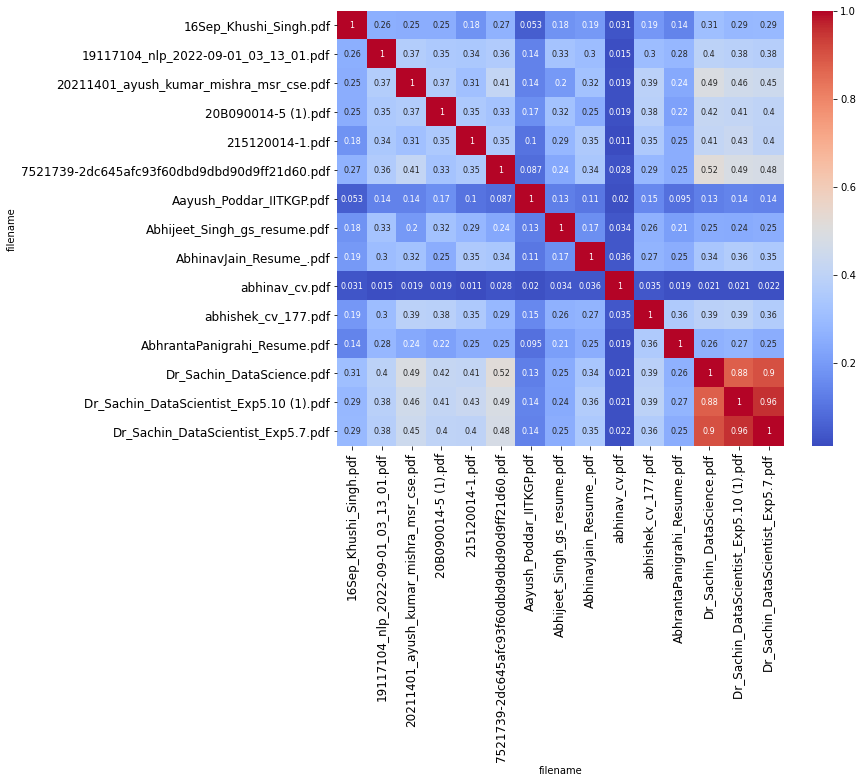

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
# Set figure size
plt.figure(figsize=(10, 8))

# Plot the correlation matrix
sns.heatmap(df2_sim_table, annot=True, cmap='coolwarm', annot_kws={"size": 8})

# Adjust the annotation text size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [33]:
for i in range(len(df2_sim_table)):
    for j in range(len(df2_sim_table)):
        if i==j:
            df2_sim_table.iloc[i,j]=0

In [34]:
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
corr_mat=df2_sim_table
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values(ascending = False).head(10)
print(sorted_mat)

filename                                 filename                                    
Dr_Sachin_DataScientist_Exp5.7.pdf       Dr_Sachin_DataScientist_Exp5.10 (1).pdf         0.955312
                                         Dr_Sachin_DataScience.pdf                       0.903992
Dr_Sachin_DataScientist_Exp5.10 (1).pdf  Dr_Sachin_DataScience.pdf                       0.876416
Dr_Sachin_DataScience.pdf                7521739-2dc645afc93f60dbd9dbd90d9ff21d60.pdf    0.518964
                                         20211401_ayush_kumar_mishra_msr_cse.pdf         0.490198
Dr_Sachin_DataScientist_Exp5.10 (1).pdf  7521739-2dc645afc93f60dbd9dbd90d9ff21d60.pdf    0.485746
Dr_Sachin_DataScientist_Exp5.7.pdf       7521739-2dc645afc93f60dbd9dbd90d9ff21d60.pdf    0.477894
Dr_Sachin_DataScientist_Exp5.10 (1).pdf  20211401_ayush_kumar_mishra_msr_cse.pdf         0.458825
Dr_Sachin_DataScientist_Exp5.7.pdf       20211401_ayush_kumar_mishra_msr_cse.pdf         0.447193
Dr_Sachin_DataScientist_Exp5.10 

### Based on the heatmap and table analysis, we can draw the following conclusions:

1. A value of 1 in the heatmap indicates that the documents are perfectly similar to themselves, which is expected.

2. The pair (Dr_Sachin_DataScientist_Exp5.7.pdf, Dr_Sachin_DataScientist_Exp5.10 (1).pdf) has the highest similarity with a value of 0.96, indicating a strong similarity between these two documents.

3. The pair (Dr_Sachin_DataScientist_Exp5.7.pdf, Dr_Sachin_DataScience.pdf) has the second highest similarity with a value of 0.90. This suggests a significant level of similarity between these two resumes.

4. Based on the similarity values, we can conclude that the resumes Dr_Sachin_DataScientist_Exp5.7.pdf, Dr_Sachin_DataScientist_Exp5.10 (1).pdf, and Dr_Sachin_DataScience.pdf belong to the same person. The high similarity scores indicate a consistent pattern across these documents.

5. An interesting finding is that the resumes 7521739-2dc645afc93f60dbd9dbd90d9ff21d60.pdf and 20211401_ayush_kumar_mishra_msr_cse.pdf are approximately 50% similar to the Dr_Sachin_DataScience.pdf resume. This suggests some degree of similarity or shared content between these documents.

6. Overall, the analysis of the heatmap and similarity values provides insights into the relationships and similarities among the documents, allowing us to identify matching resumes and potential patterns in the data.